In [22]:
pip install uproot

Note: you may need to restart the kernel to use updated packages.


# Hodoscopio con GEMs

## Generador de imagenes a partir de datos en Root

In [13]:
import uproot
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np                
import os
from pathlib import Path

# Abre el archivo ROOT
f = uproot.open("GEM5on_3800V_4Hyb_3Fe55_FEC1_2min_bc_40p000_tac_60_ccs_2_cs_1_dt_200_mst_2_spc_500_dp_200_cr_0p50-2p00_coin_center-of-mass_LabHEP.root")

# Lista las claves disponibles
print(f.keys())

# Accede a los objetos
M1 = f['1_cluster_utpc;1']

# Verifica el tipo de objeto
print(M1)


obj = f["1_cluster_utpc;1"]
print(type(obj))  # Ver el tipo de objeto

obj = f["1_cluster_utpc;1"]
print(obj)  # Muestra metadatos del histograma
data = obj.to_numpy()[0]  # Extraer datos del histograma
print(data)

plt.figure(figsize=(10, 8))


['hits;1', 'clusters_plane;1', 'clusters_detector;1', '1_delta_time_planes;1', '1_delta_time_utpc_planes;1', '1_delta_time_charge2_planes;1', '1_dt0;1', '1_dt1;1', '1_cluster;1', '1_cluster_utpc;1', '1_cluster_charge2;1', '1_cluster_algo;1', '1_size_plane0;1', '1_size_plane1;1', '1_size_plane01;1', '1_charge_plane0;1', '1_charge_plane1;1', '1_charge_plane01;1']
<TH2D (version 4) at 0x01e4523f3200>
<class 'uproot.models.TH.Model_TH2D_v4'>
<TH2D (version 4) at 0x01e4523f3200>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

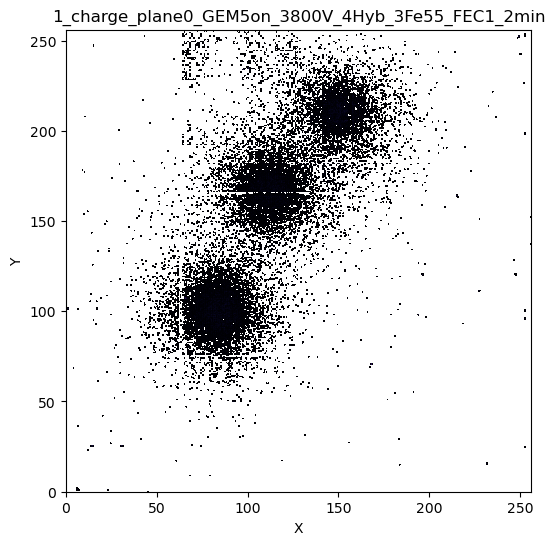

In [47]:
# Abre el archivo ROOT
f = uproot.open("GEM5on_3800V_4Hyb_3Fe55_FEC1_2min_bc_40p000_tac_60_ccs_2_cs_1_dt_200_mst_2_spc_500_dp_200_cr_0p50-2p00_coin_center-of-mass_LabHEP.root")

# Selecciona la clave del histograma 2D
clave = "1_charge_plane0;1"
histo2D = f[clave]

# Extraer los datos del histograma 2D
valores, xedges, yedges = histo2D.to_numpy()

# Definir un mapa de colores donde 0 sea blanco
cmap = plt.cm.inferno  # Colormap oscuro para altas frecuencias
cmap.set_under("white")  # Fuerza los valores bajos (0) a blanco

# Graficar el histograma 2D
plt.figure(figsize=(6, 6))
plt.imshow(valores.T, origin="lower", aspect="auto", extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap=cmap, norm=plt.Normalize(vmin=1, vmax=np.max(valores))) 
plt.xlabel("X")
plt.ylabel("Y")
plt.title("1_charge_plane0_GEM5on_3800V_4Hyb_3Fe55_FEC1_2min")
#plt.savefig("1_charge_plane0_GEM5on_3800V_4Hyb_3Fe55_FEC1_2min.pdf.pdf", format="pdf", dpi=300, bbox_inches="tight") 
#Exporta a pdf en carpeta donde esta el notebook, usar antes de show
plt.show()


#Se usa plt.cm.inferno, que tiene colores oscuros para valores altos y claros para bajos.
#cmap.set_under("white") establece que valores por debajo de vmin sean blancos.
#plt.Normalize(vmin=1, vmax=np.max(valores)) asegura que el rango mínimo empiece en 1 para evitar que 0 tenga color oscuro.